In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')

print("✅ Housing data loaded successfully!")
df.head()

✅ Housing data loaded successfully!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
print("--- Data Information ---")
df.info()

print("\n--- Statistical Summary ---")
df.describe()

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

--- Statistical Summary ---


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

print("✅ Binary columns converted to numbers.")
df.head()

✅ Binary columns converted to numbers.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)

df = pd.concat([df, status], axis=1)

df.drop(['furnishingstatus'], axis=1, inplace=True)

print("✅ 'furnishingstatus' handled. New columns added.")
df.head()

✅ 'furnishingstatus' handled. New columns added.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("✅ Numerical features scaled successfully.")
df.head()

✅ Numerical features scaled successfully.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,False,False
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,False,False
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,True,False
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,False,False
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,False,False


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("✅ Data split successfully!")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

✅ Data split successfully!
Training set has 436 samples.
Testing set has 109 samples.


In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [8]:
y_pred = lm.predict(X_test)

predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

print("✅ Predictions made on the test set.")
print("Showing a sample of actual vs. predicted prices:")
predictions_df.head()

✅ Predictions made on the test set.
Showing a sample of actual vs. predicted prices:


,Actual Price,Predicted Price
265,0.229697,0.192520
54,0.484848,0.431864
171,0.303030,0.334071
244,0.242424,0.301323
268,0.227879,0.264840


--- Model Evaluation ---
Mean Squared Error (MSE): 0.0084
R-squared (R²): 0.6807


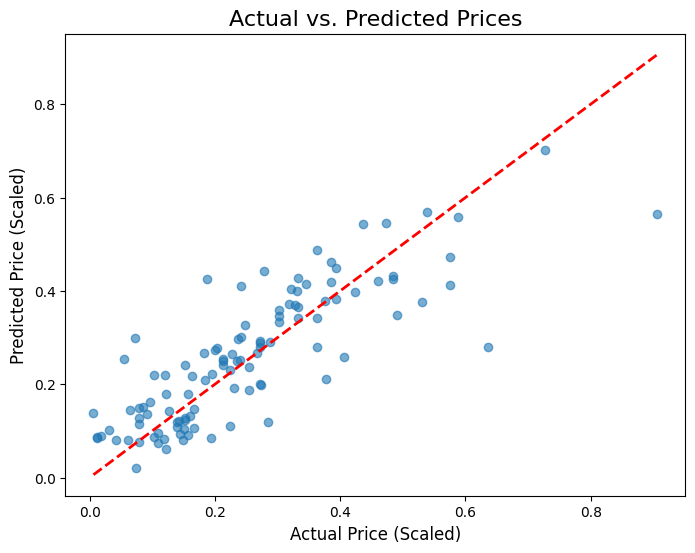

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price (Scaled)', fontsize=12)
plt.ylabel('Predicted Price (Scaled)', fontsize=12)
plt.show()